## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja liniowa wieloraka

Rzadko kiedy zdarza się taka sytuacja, że zależność opisuje się na podstawie tylko jednej zmiennej. Z reguły na wynik zmiennej objaśnianej (y) ma wpły więcej różnych cech. Przykładowo, na cenę samochodu ma wpływ rok produkcji, przebieg, ilość koni mechanicznych itp. Dlatego właśnie jest naturalna potrzeba rozwinięcia algorytmu regresji liniowej z jedną cechą na większą ilość cech.

Algorytm, który implementowaliśmy w poprzednim zadaniu jest szczególnym przypadkiem regresji liniowej, ale może zostać on w łatwy sposób uogólniony. Mechanizmy, które poznaliśmy wcześniej takie jak obliczanie funkcji błędu, pochodnych cząstkowych, w dalszym ciągu są aktualne. Trzeba jedynie uwzględnić dodatkowe cechy.

### Zadanie 1

W zbiorze danych z zarobkami, który wykorzystywany był w poprzednim zadaniu, znajduje się pominięta wcześniej cecha. Wczytaj dane z pliku Salary.csv, tym razem z dwiema zmiennymi objaśniającymi: YearsExperience i Age oraz zmienną objaśnianą Salary. Stwórz wykres 3D przedstawiający dane.

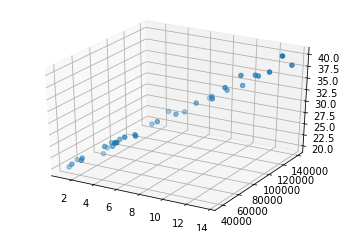

In [26]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')

df = pd.read_csv('datasets/Salary.csv', sep=',')
x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
z = df['Age'].values.reshape(df['Age'].shape[0], 1)
y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)

ax.scatter(x,y,z)

plt.show()

## Zadanie 2

Przerób algorytm znajdujący się w funkcji _learn_and_fit(x,y)_ w taki sposób, aby uwzględniał dodatkową cechę.
Funkcja regresji liniowej przybierze w tym momencie postać:

\begin{equation}
f(x^{(i)}) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_2 = \beta_{0} + \beta_{1} YearsExperience + \beta_{2} Age
\end{equation}

Pojawienie się kolejnej cechy wymaga akutalizacji obliczania gradientu. Należy dodatkowo obliczyć pochodną cząstkową względem parametru $\beta_{2}$, a następnie zaktualizować wartość tego parametru. 

Obliczenie pochodnej cząstkowej wygląda analogicznie jak w przypadku parametru $\beta_{1}$.

\begin{equation}
    \frac{\partial SSR}{\partial \beta_{2}} = \frac{1}{n} \sum^{n}_{i=1} (f(x^{(i)}) - y^{(i)})x_{1}^{(i)}
\end{equation}

Aktualizacja wartości współczynnika również jest analogiczna.

\begin{equation}
    \beta_{2} = \beta_{2} - \alpha \frac{\partial SSR}{\partial \beta_{2}} 
\end{equation}

_Uwaga: Zastanów się, w jaki sposób zaimplementować obługę kolejnych cech, tak aby po pojawieniu się 3 cechy nie trzeba było modyfikować algorytmu._

In [27]:
def init():    
    import random
    b00 = random.uniform(0, 1)
    b11 = random.uniform(0, 1)
    b22 = random.uniform(0, 1)

    alfa = 0.001
        
    return b00, b11, b22, alfa

def prediction(b00, b11, b22):
    predx = []

    for val1, val2 in zip(x,z):
        result = b00 + (b11 * val1[0]) + (b22 * val2[0])
        predx.append(result)
        
            
    return predx

def calc_error(regx):
    import numpy as np
    m = len(regx)
    tempres = 0
    result = 0

    for i in range(m):
        tempres = result + (regx[i] - y[i]) ** 2
        result = tempres[0]
    ssr = result / (2*m)
        
    return ssr

def calc_gradient(regx):
    m = len(regx)
    ssrb0 = ssrb1 = ssrb2 = 0

    for i in range(m):
        ssrb0 = ssrb0 + (regx[i] - y[i])
        ssrb1 = ssrb1 + (regx[i] - y[i]) * x[i, 0]
        ssrb2 = ssrb2 + (regx[i] - y[i]) * z[i, 0]

    ssrb0 = ssrb0[0] / m
    ssrb1 = ssrb1[0] / m
    ssrb2 = ssrb2[0] / m
            
    return ssrb0, ssrb1, ssrb2
    
def update_reg(b00, b11, b22, alfa, ssrb0, ssrb1, ssrb2):
    newb0 = b00 - (alfa * ssrb0)
    newb1 = b11 - (alfa * ssrb1)
    newb2 = b22 - (alfa * ssrb2)
        
    return newb0, newb1, newb2

In [28]:
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
def learn_and_fit(x, y):
    b0 = []
    b1 = []
    b2 = []
    betas = []
    error = []
    
    global reglist
    regx = []
    
    b00, b11, b22, alfa = init()
    
    for i in range(2000):
        predx = prediction(b00, b11, b22)
        regx.append(predx)
        err = calc_error(regx[i])
        error.append(err)
        ssrb0, ssrb1, ssrb2 = calc_gradient(regx[i])
        b0.append(b00)
        b1.append(b11)
        b2.append(b22)
        b00, b11, b22 = update_reg(b00, b11, b22, alfa, ssrb0, ssrb1, ssrb2)
    
    reglist = regx
    
    return b0, b1, b2, error

In [29]:
import unittest
import pandas as pd

class SimpleLinearRegressionTest(unittest.TestCase):
    
    def test_learn_and_fit(self):
        df = pd.read_csv('datasets/Salary.csv', sep=',')
        x = df['YearsExperience'].values.reshape(df['YearsExperience'].shape[0], 1)
        y = df['Salary'].values.reshape(df['Salary'].shape[0], 1)
        
        b0, b1, b2, error = learn_and_fit(x, y)
    
        self.assertTrue(len(b0) > 1)
        self.assertTrue(len(b1) > 1)
        self.assertTrue(len(b0) == len(b1))
        self.assertTrue(all(i >= j for i, j in zip(error, error[1:]))) #Sprawdzenie, czy błędy nie rosną
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_learn_and_fit (__main__.SimpleLinearRegressionTest) ... ok

----------------------------------------------------------------------
Ran 1 test in 1.802s

OK


### Zadanie 3

Do stworzonego z zadaniu 1 wykresu dodaj płaszczyznę regresji. Pokaż w formie animacji, jak zmieniała się regresja w kolejnych epokach.

Próba utworzenia animacji płaszczyzny regresji zakończyła się niepowodzeniem.

In [58]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation as animation
import matplotlib

N = 100 # Meshsize
fps = 10 # frame per sec
frn = 2000 # frame number of the animation

x = np.linspace(0,1,14)
y = np.linspace(20000,20000,140000)
x, y = np.meshgrid(x, y)
zarray = np.zeros((14, 140000, frn))

f = lambda x,y,reglist : np.array(reglist)

for i in range(frn):
    zarray[:,:,i] = f(x,y,reglist)
    
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ims = []
for i in range(frn):
    sf = ax.plot_surface(x, y, zarray[:,:,i], color='0.75', rstride=1, cstride=1)
    ims.append([sf])

ax.set_zlim(20,40)
ani = animation.ArtistAnimation(fig, ims, interval=10/fps, blit=True)


from IPython.display import HTML
HTML(ani.to_jshtml())

numpy: 1.18.5


ValueError: could not broadcast input array from shape (2000,35) into shape (14,140000)

### Zadanie 4

W sytuacji, w której zbiór danych zawiera więcej zmiennych objaśniających niż 2, niemożliwym staje się wizualizacja prostej regresji i ocena w taki sposób stworzonego modelu. Bardzo przydatnym rozwiązaniem jest wtedy stworzenie wykresu błędów regresji. Jeśli wartości błędu spadają wraz z kolejnymi epokami, oznacza to, że jesteśmy na dobrej drodze, a nasz algorytm działa poprawnie. Celem tego zadania będzie stworzenie finalnego modelu regresji liniowej, który będzie przyjmował dowolną liczbę zmiennych objaśniających.

Na podstawie wcześniejszych implementacji, stwórz implementację funkcji *learn_and_fit_multi(X, y)*, która będzie przyjmować zbiór wejściowy z dowolną ilością kolum (cech). Dla takiego zbioru zbioru danych ma zostać stworzony model regresji. Funkcja podobnie jak wcześniej, ma zwracać współczynniki oraz wartość błędu w każdej epoce. 

W notebooku z opisem regresji liniowej przedstawione zostały wzory na ogólą postać regresji. Przeanalizuj je jeszcze raz i postaraj się je zaimplementować.

Wczytaj zestaw danych *multi_variable_regression.csv* z katalogu datasets. Dane wygenerowane zostały w taki sposób, że są wysoce liniowo zależne. Wartość błędu dla nauczonego modelu powinna być w takim przypadku niewielka. Przetestuj na wczytanym zbiorze swój algorytm.

In [21]:
        import pandas as pd
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib import cm
        import matplotlib.pyplot as plt
        import numpy as np

        df = pd.read_csv('datasets/multi_variable_regression.csv', sep=',')
        x = df.iloc[:,0:(df.columns.size-1)]
        x = x.iloc[0:].values.tolist()
        y = df.iloc[:,-1:]
        y = y.iloc[0:].values.tolist()

In [22]:
def calc_error(predx):
    m = len(predx)
        
    ssr = np.sum([(p-v)**2 for p,v in zip(predx,y)]) / (2*m)
    return ssr
    
def update_reg(betas, alfa, ssrbs):
    tempb = []
    for b, s in zip(betas, ssrbs):
        newb = b - (alfa * s)
        tempb.append(newb)
    return tempb

In [23]:
'''
input:
X - wartości zmiennych objaśniających YearsExperience oraz Age dla wszystkich obserwacji
y - wartości zmiennej objaśnianej Salary dla wszystkich obserwacji

output:
b0: [] - lista z współczynnikami beta_0 w każdej z epok
betas: [] - lista z współczynnikami beta_1, beta_2 w każdej z epok
error: [] - lista z błędem w każdej epoce
'''
import random
def learn_and_fit(x, y):
    betas = []
    error = []
    b = []
    ssrbs = []
    
    global reglist
    global errorlist
    regx = []
    
    
    alfa = 0.0005
    m = len(x[0])
    
    inc = 0

    b00 = random.uniform(0, 1)
    for inc in range(0,(len(x[0]))):
        temp = random.uniform(0, 1)
        b.append(temp)
    
    flipx = list(zip(*x))
    
    for i in range(1000):
        pred = b00 + np.dot(x, b)
        err = calc_error(pred)
        error.append(err)
        ssrb0 = np.sum([(p-v) for p,v in zip(pred,y)]) / m
        ssrbb = np.dot(flipx, [(p-v) for p,v in zip(pred,y)]) / m
        betas.append(b)
        b = update_reg(b, alfa, ssrbb)
    
    errorlist = error
    
    return betas, error

In [24]:
import unittest
import pandas as pd

class SimpleLinearRegressionTest(unittest.TestCase):
    
    def test_learn_and_fit(self):
        df = pd.read_csv('datasets/multi_variable_regression.csv', sep=',')
        x = df.iloc[:,0:(df.columns.size-1)]
        x = x.iloc[0:].values.tolist()
        y = df.iloc[:,-1:]
        y = y.iloc[0:].values.tolist()
    
        b, error = learn_and_fit(x, y)

        self.assertTrue(len(b[0]) > 1)
        self.assertTrue(len(b[1]) > 1)
        self.assertTrue(len(b[0]) == len(b[1]))
        self.assertTrue(all(i >= j for i, j in zip(error, error[1:]))) #Sprawdzenie, czy błędy nie rosną
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_learn_and_fit (__main__.SimpleLinearRegressionTest) ... ok

----------------------------------------------------------------------
Ran 1 test in 1.402s

OK


### Zadanie 5

Stwórz wykres przedstawiający zmianę błędu regresji w kolejnych epokach. Napisz co można na jego podstawie wywnioskować.

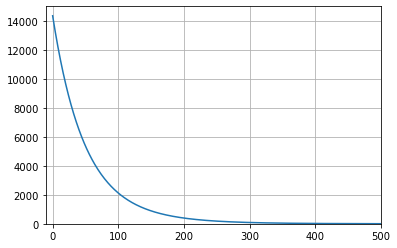

In [25]:
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation
    import pylab
    import numpy as np
    import pandas as pd

    x = range(0, 1000)
    
    fig, ax = plt.subplots()
    ax.set_xlim(( -10, 500))
    ax.set_ylim((0, 15000))

    pylab.plot(x,errorlist)
    pylab.grid(True)
    pylab.show()

Na podstawie wykresu można wywnioskować, że około 300 epok jest potrzebne by zmniejszyć błąd tak by był bliski zeru, przy alfie równej 0,0005